In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from Configs.config import DOC_WIDTH, DOC_HEIGHT, BOUNDED_BOX_MAX_AREA

In [37]:
image = cv2.imread('output/scanned/photo_2_2024-12-03_21-33-54.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [38]:
full_image = binary
height, width = binary.shape[:2]
width_coefficient = width / DOC_WIDTH
height_coefficient = height / DOC_HEIGHT
coefficient = (width_coefficient + height_coefficient) / 2

contours_rec, _ = cv2.findContours(full_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
rectangles = []
for contour in contours_rec:
    approx = cv2.approxPolyDP(contour, 0.002 * cv2.arcLength(contour, True), True)
    bounded_boxes = cv2.boundingRect(approx)
    x, y, w, h = bounded_boxes
    aspect_ratio = w / float(h)
    if aspect_ratio > 1:
        area = cv2.contourArea(contour)
        if (coefficient * BOUNDED_BOX_MAX_AREA) > area > 10:
            rectangles.append((x, y, w, h))

here
here


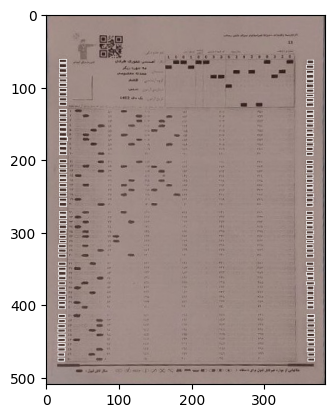

In [42]:
groups = []

for item in rectangles:
    added = False
    for group in groups:
        if abs(group[0][0] - item[0]) <= 10:
            group.append(item)
            added = True
            break
    if not added:
        groups.append([item])

for group in groups:
    if len(group) == 60:
        print('here')
        for rec in group:
            x, y, w, h = rec
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 1)

plt.imshow(image)
plt.show()